In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft, istft, resample, resample_poly

In [22]:
def plot_waveform(audio, sample_rate, title):
    time = np.arange(len(audio))/sample_rate
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def plot_spectrogram(frequencies, times, spectrogram, title):
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(times, frequencies, np.abs(spectrogram),cmap='viridis',vmin=0,vmax=10000)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0,10000)
    plt.colorbar(label='Amplitude')
    plt.show()

<h2>任务1读取</h2>

In [5]:
sample_rate, audio_data = wavfile.read("./th10_13.wav")
audio_data = audio_data[:,0]
#audio_data = audio_data*1.0/(max(abs(audio_data)))
print(audio_data.shape)
print(sample_rate)


(13529088,)
44100


<h2>任务1画图</h2>

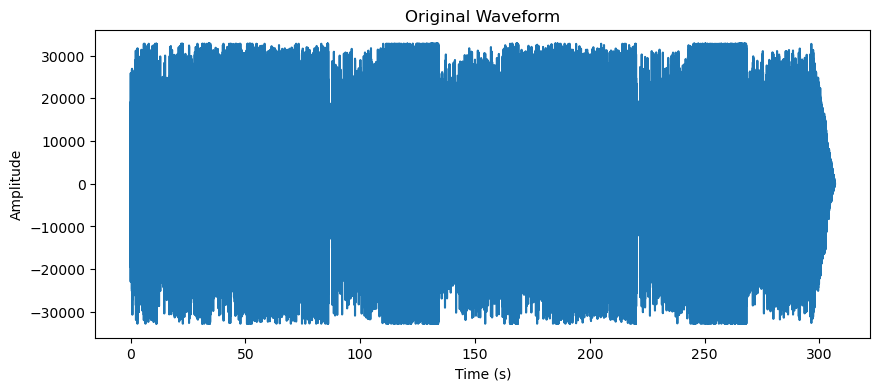

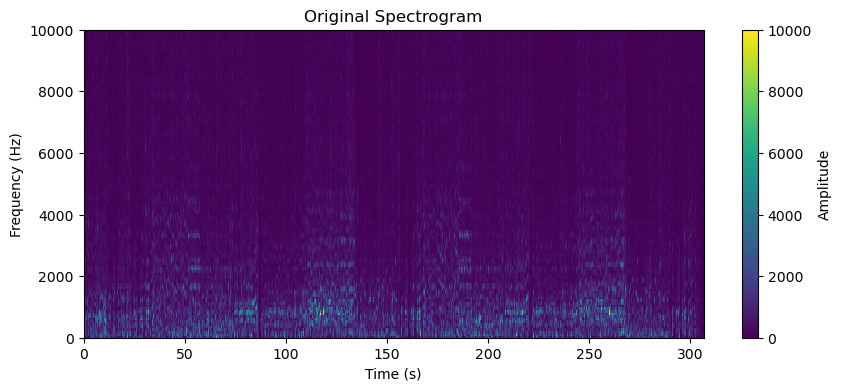

In [15]:
frequencies, times, spectrogram = stft(audio_data, fs=sample_rate, nperseg=512)
plot_waveform(audio_data, sample_rate, "Original Waveform")
plot_spectrogram(frequencies, times, spectrogram, "Original Spectrogram")

<h2>任务2</h2>

<class 'numpy.int16'> (1533910,)


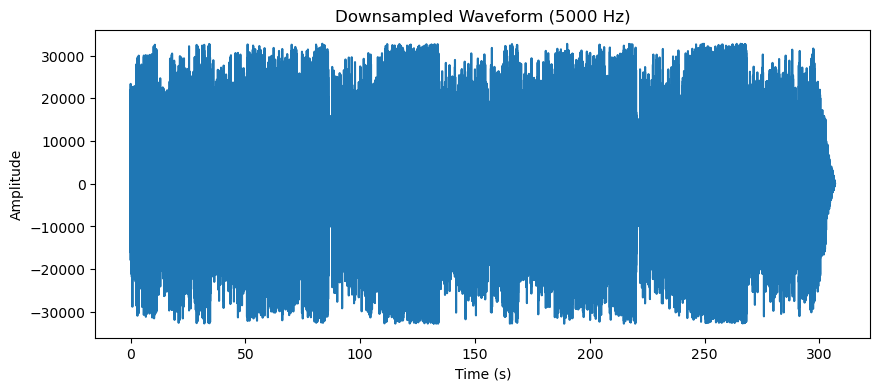

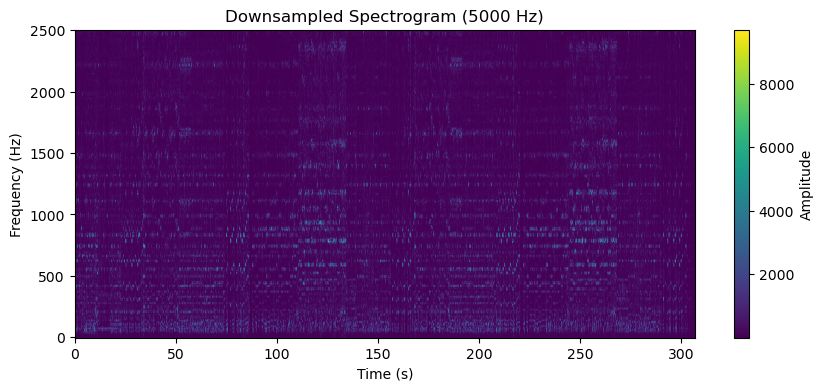

<class 'numpy.int16'> (3067820,)


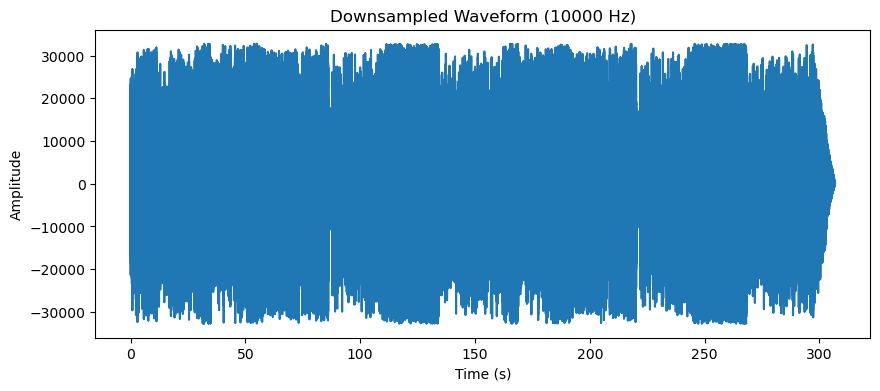

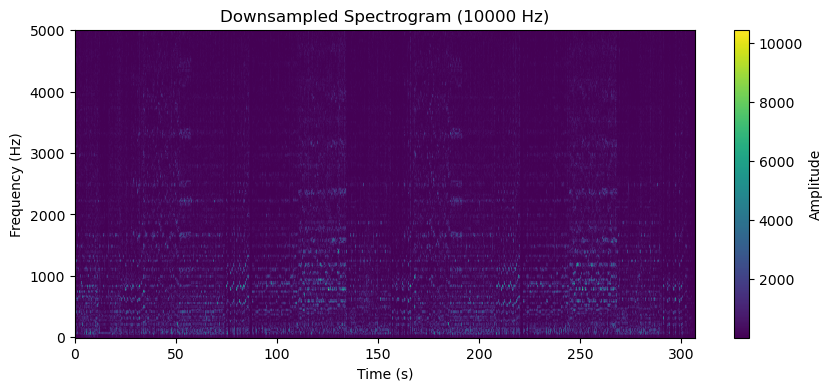

<class 'numpy.int16'> (4601730,)


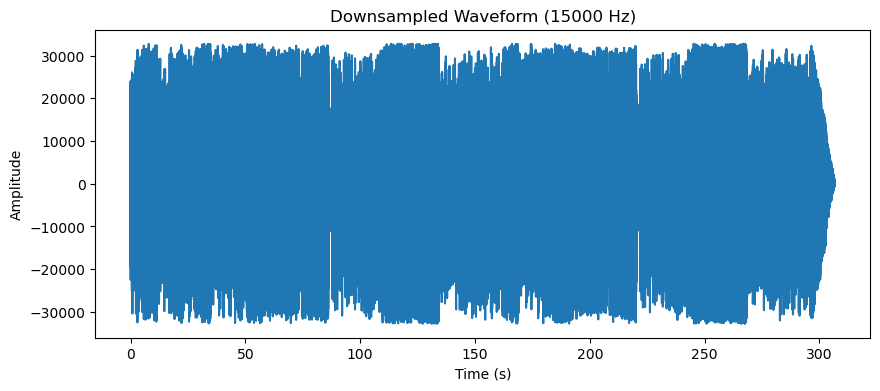

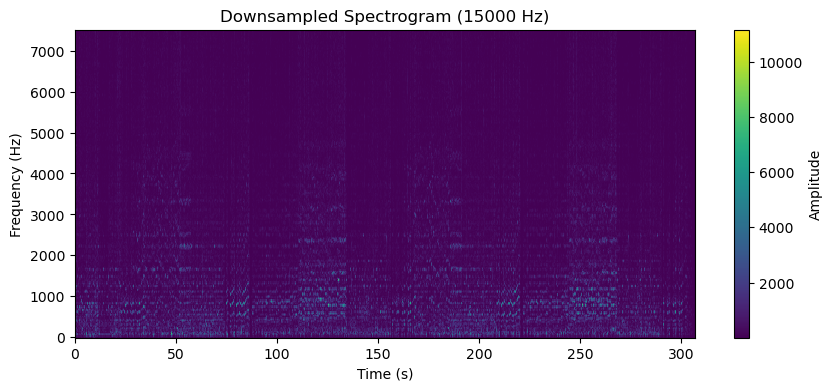

In [21]:
downsample_rates = [5000, 10000, 15000]
downsampled_audio = []
for rate in downsample_rates:
    downsampled_signal = resample(audio_data, int(len(audio_data) * rate / sample_rate))
    downsampled_audio.append(downsampled_signal)
    downsampled_signal = (downsampled_signal).astype(np.int16)
    print(type(downsampled_signal[0]), downsampled_signal.shape)
    frequencies, times, spectrogram = stft(downsampled_signal, fs=rate, nperseg=512)
    plot_waveform(downsampled_signal, rate, f"Downsampled Waveform ({rate} Hz)")
    plot_spectrogram(frequencies, times, spectrogram, f"Downsampled Spectrogram ({rate} Hz)")
    wavfile.write(f"downsampled_{rate}.wav", rate, downsampled_signal)

<h2>任务3</h2>

(13529087,)


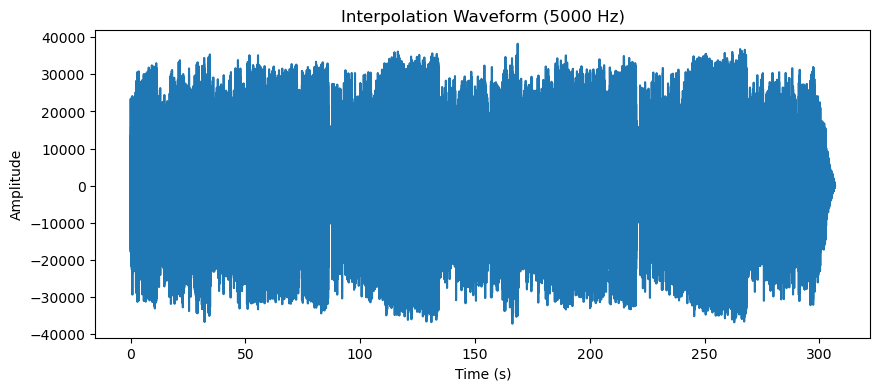

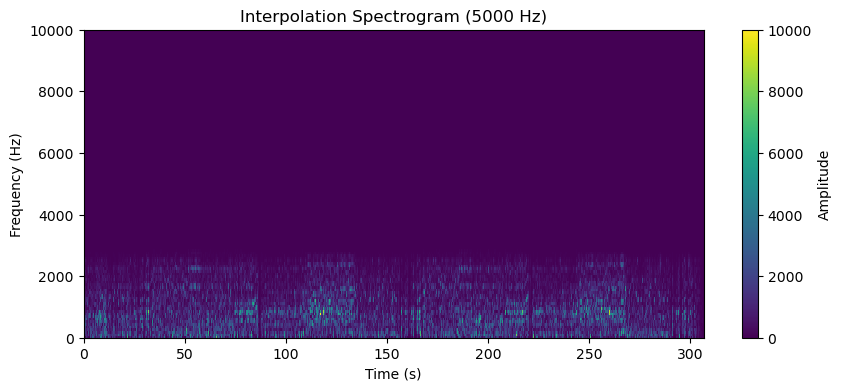

(13529087,)


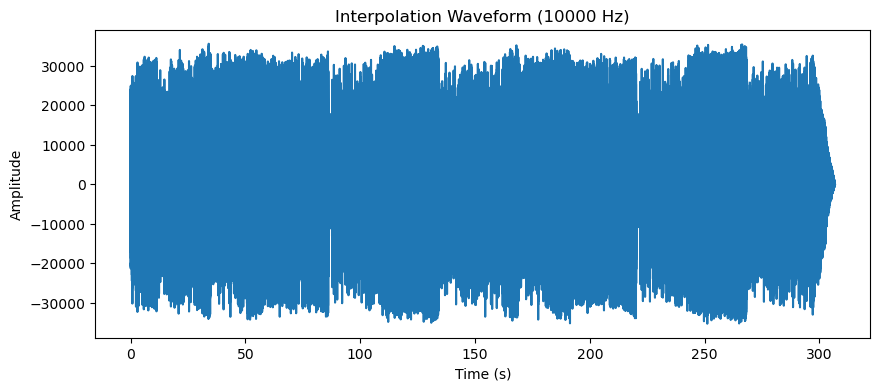

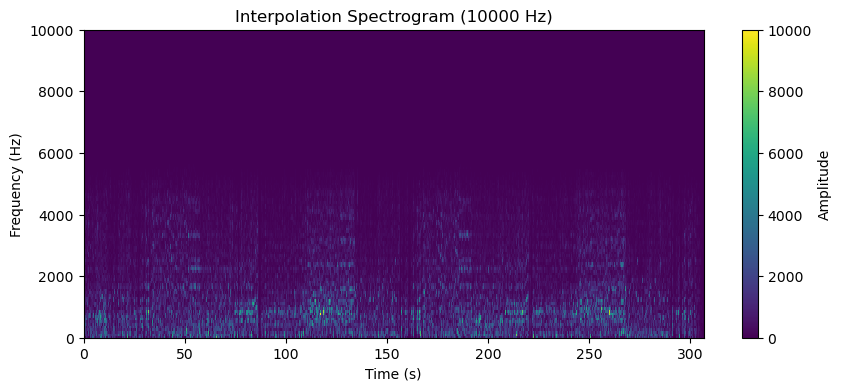

(13529087,)


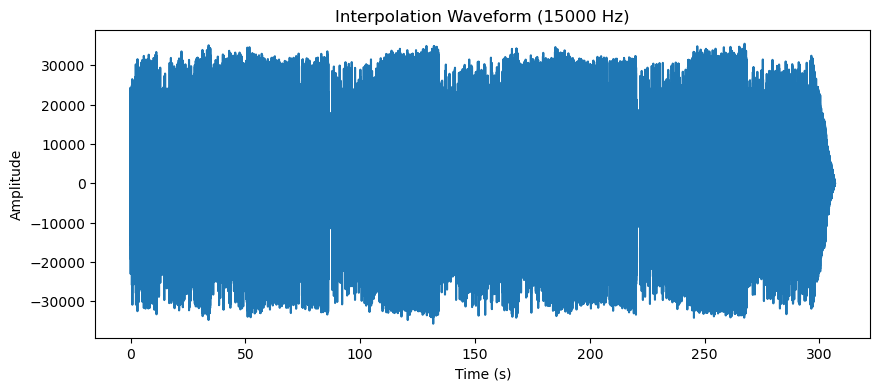

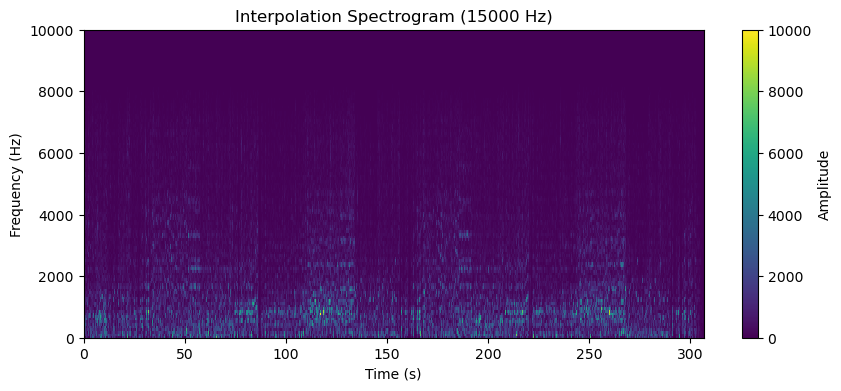

In [23]:
for i, rate in enumerate(downsample_rates):
    resampled_signal = resample_poly(downsampled_audio[i], sample_rate, rate)
    frequencies, times, spectrogram = stft(resampled_signal, fs=sample_rate, nperseg=512)
    downsampled_signal = (resampled_signal).astype(np.int16)
    print(downsampled_signal.shape)
    plot_waveform(resampled_signal, sample_rate, f"Interpolation Waveform ({rate} Hz)")
    plot_spectrogram(frequencies, times, spectrogram, f"Interpolation Spectrogram ({rate} Hz)")
    wavfile.write(f"Interpolation_{rate}.wav", sample_rate, downsampled_signal)

<h2>任务4</h2>

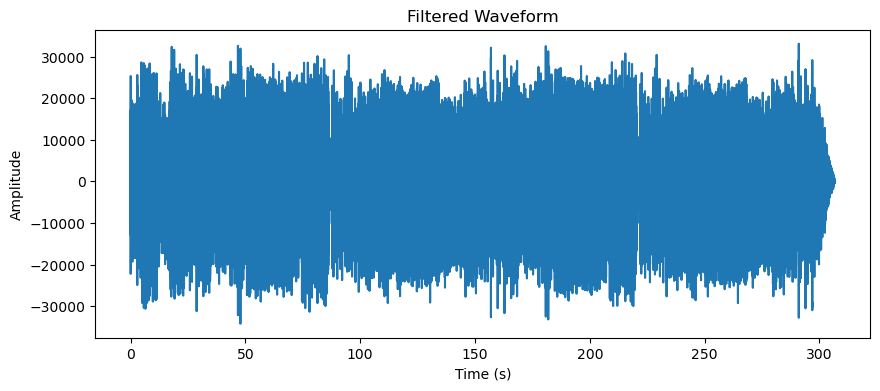

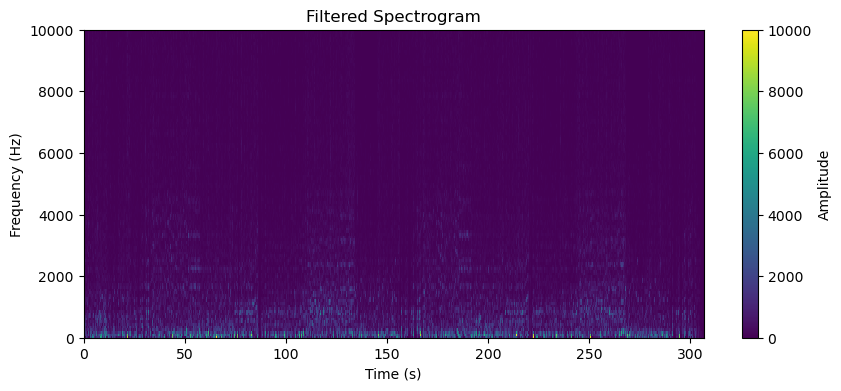

In [24]:
from scipy.signal import butter,sosfiltfilt,sosfilt

#带通
def butter_band(cutoff,fs,order = 5):
    sos = butter(order,cutoff,btype='bandpass',analog=False,output='sos')
    return sos
 
def band_filter(data,cutoff,fs,order = 5):
    sos = butter_band(cutoff,fs,order=order)
    filtered_signal = sosfiltfilt(sos,data) #将数据应用于滤波器中,注意：sosfiltfilt，会出现边界问题，幅值会改变
    return filtered_signal

#低通
def butter_low(cutoff,fs,order = 5):
    sos = butter(order,cutoff,btype='low',analog=False,output='sos')
    return sos
 
def low_filter(data,cutoff,fs,order = 5):
    sos = butter_low(cutoff,fs,order=order)
    filtered_signal = sosfiltfilt(sos,data) #将数据应用于滤波器中,注意：sosfiltfilt，会出现边界问题，幅值会改变
    return filtered_signal

#高通
def butter_high(cutoff,fs,order = 5):
    sos = butter(order,cutoff,btype='high',analog=False,output='sos')
    return sos
 
def high_filter(data,cutoff,fs,order = 5):
    sos = butter_high(cutoff,fs,order=order)
    filtered_signal = sosfiltfilt(sos,data) #将数据应用于滤波器中,注意：sosfiltfilt，会出现边界问题，幅值会改变
    return filtered_signal

#过滤
filtered_audio = band_filter(audio_data,[400/sample_rate,1000/sample_rate],sample_rate,1)
filtered_audio_low = low_filter(audio_data,400/sample_rate,sample_rate,1)
filtered_audio_high = high_filter(audio_data,1000/sample_rate,sample_rate,1)

#混合
filtered_audio = 0.5*filtered_audio_high+1.5*filtered_audio_low+0.1*filtered_audio

#画图
frequencies, times, spectrogram = stft(filtered_audio, fs=sample_rate, nperseg=512)
plot_waveform(filtered_audio, sample_rate, "Filtered Waveform")
plot_spectrogram(frequencies, times, spectrogram, "Filtered Spectrogram")

#保存
filtered_audio = (filtered_audio).astype(np.int16)
wavfile.write("Filtered_audio.wav", sample_rate, filtered_audio)